# **Hospital Length of Stay (LOS) Prediction**

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem:**

1. Import the necessary libraries
2. Read the dataset and get an overview
3. Exploratory data analysis - a. Univariate b. Bivariate
4. Data preprocessing if any
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one
8. Observations and business insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [2]:
# read the data
data = pd.read_csv("healthcare_data.csv")

# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

In [3]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [4]:
data.shape

(500000, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000











-The column patientid is an identifier for patients in the data. This column will not help with our analysis so we can drop it.


In [7]:
# To view patientid and the number of times they have been admitted to the hospital
data['patientid'].value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

In [8]:
# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data = data.drop(columns=['patientid'])

In [13]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

In [15]:
# Checking the descriptive statistics of the columns
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


In [69]:
# List of all important categorical variables
cat_col = data.select_dtypes(include='object').columns.tolist()

# Printing the number of occurrences of each unique value in each categorical column
for col in cat_col:
    print('-'*20,col,'-'*20)
    print (data[col].value_counts(1))
    print('-'*50,'\n')

-------------------- Department --------------------
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
-------------------------------------------------- 

-------------------- Ward_Facility_Code --------------------
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: Ward_Facility_Code, dtype: float64
-------------------------------------------------- 

-------------------- doctor_name --------------------
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: doctor_name, dtype: float64
-------------------------------------------------- 

-------------------- Age --------------------
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70 

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In [74]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data,feature, figsize = (12,7),kde=False,bins=None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2,(ax_box2,ax_hist2) = plt.subplots(
    nrows = 2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25,0.75)},
    figsize = figsize)
    
    #creating box plot
    sns.boxplot(data = data,x = feature,ax=ax_box2,showmeans = True,color='violet')
    
    #create histograms
    sns.histplot(data = data, x = feature,ax=ax_hist2,bins=bins,palette= 'winter') if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2)    # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")       # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-")     # Add median to the histogram
    

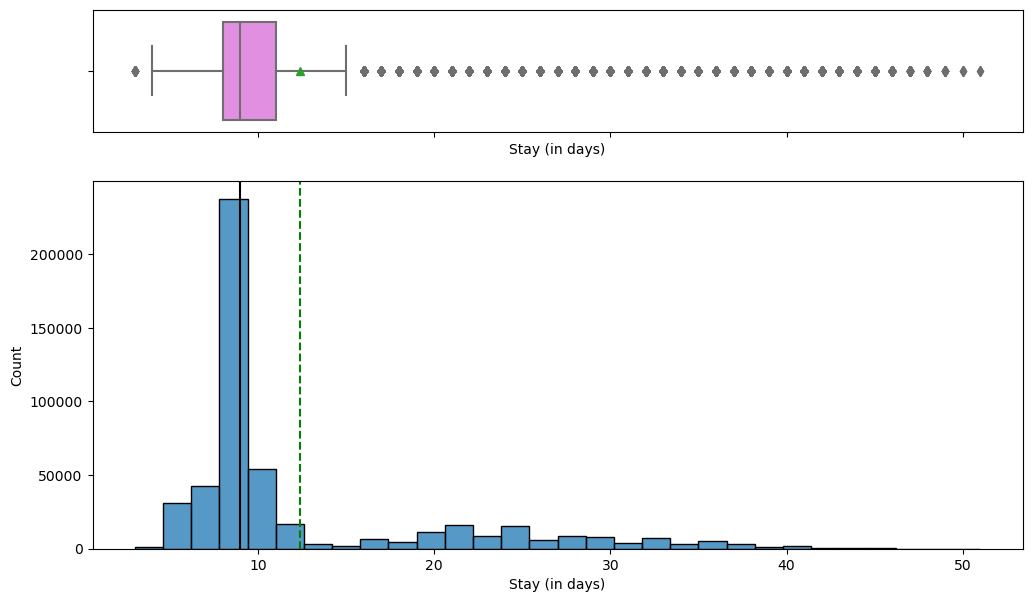

In [75]:
histogram_boxplot(data, "Stay (in days)", kde = True, bins = 30)

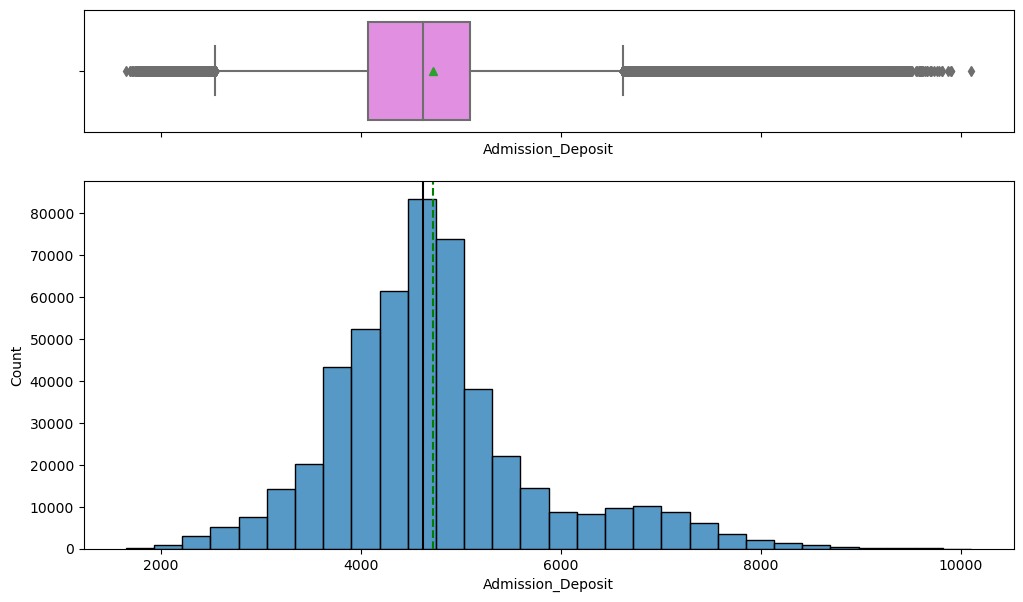

In [78]:
histogram_boxplot(data, "Admission_Deposit", kde = True, bins = 30)

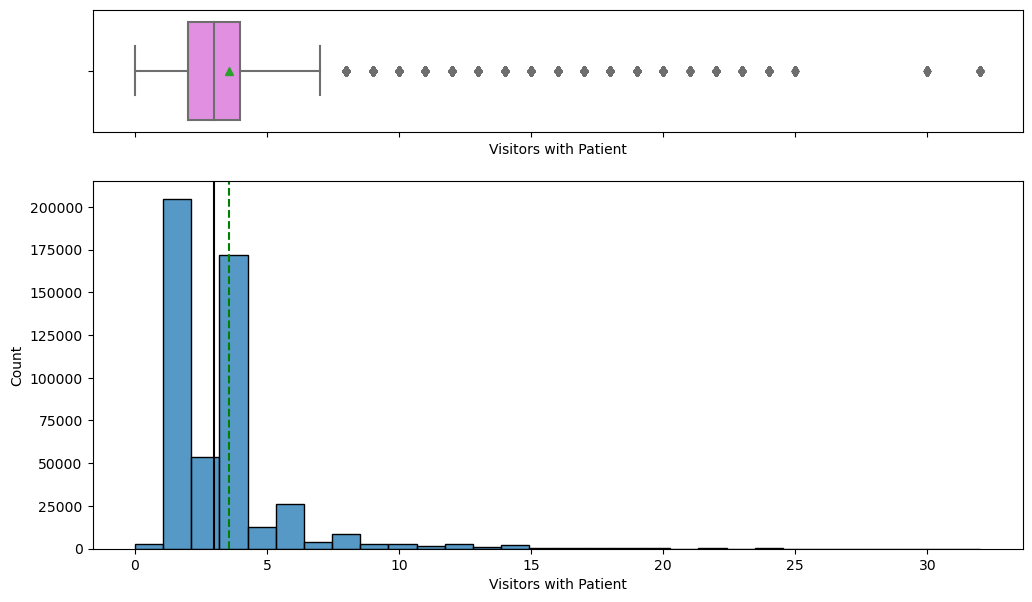

In [79]:
histogram_boxplot(data, "Visitors with Patient", kde = True, bins = 30)

### **Bivariate Analysis**

<Axes: >

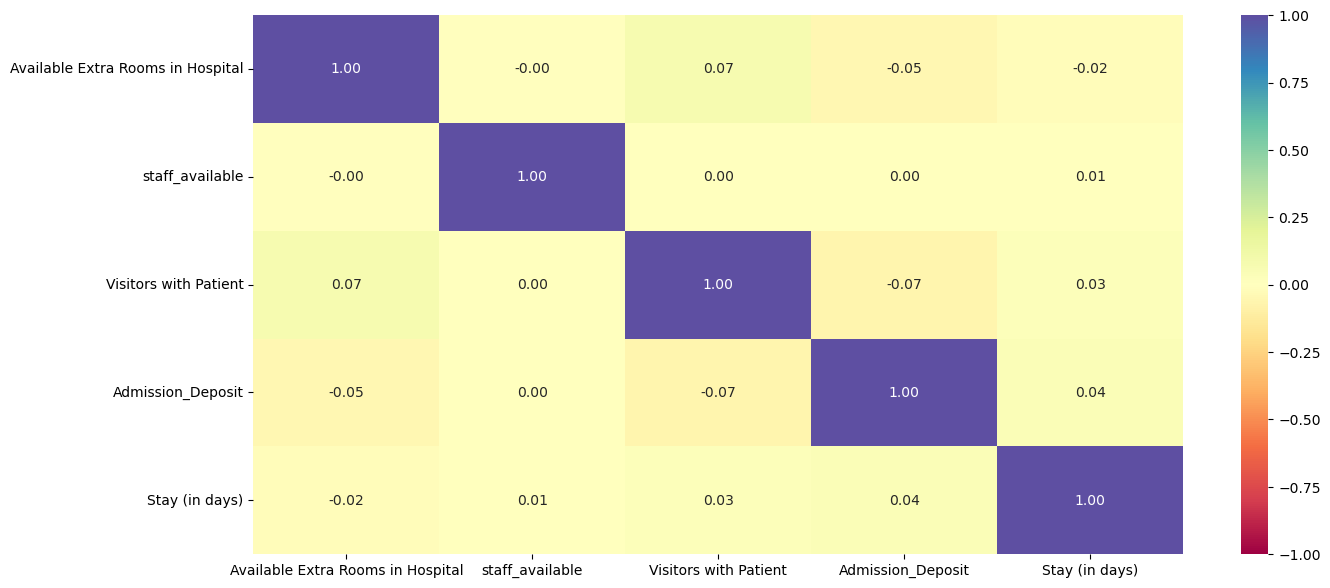

In [85]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(),annot=True,cmap = "Spectral",fmt = ".2f",vmin = -1, vmax = 1)

In [86]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

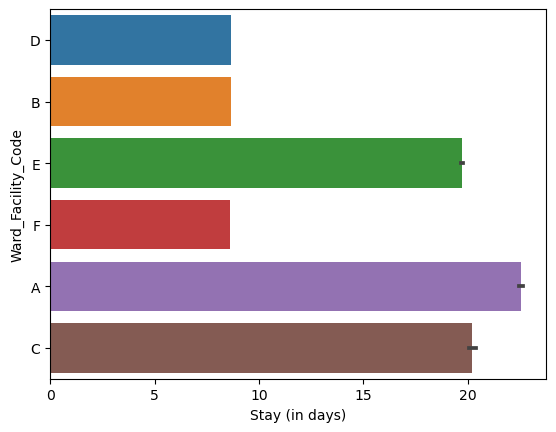

In [87]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data)
plt.show()

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

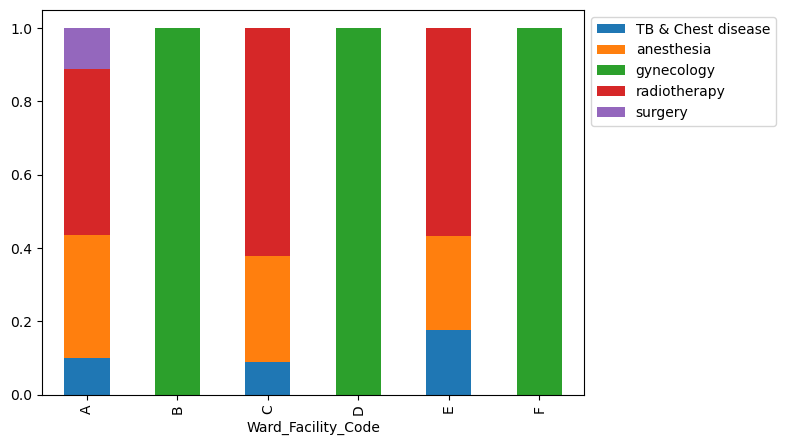

In [88]:
stacked_barplot(data, "Ward_Facility_Code", "Department")

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


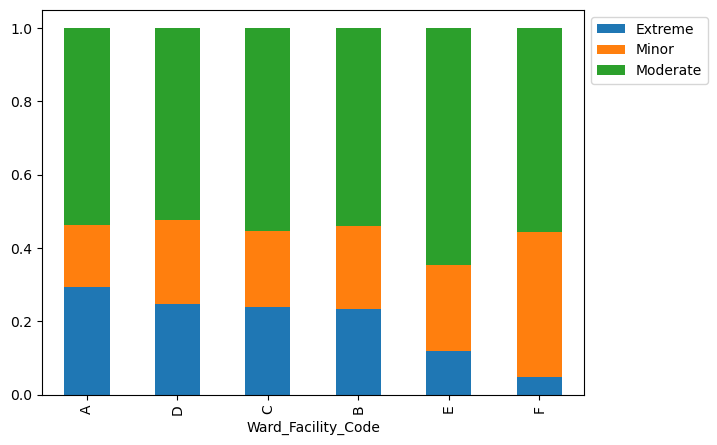

In [92]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

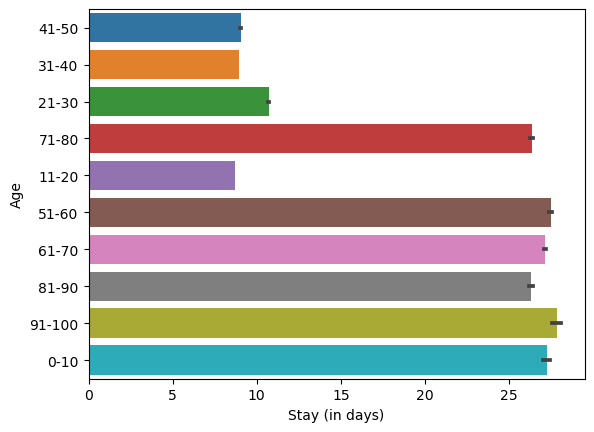

In [93]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data)
plt.show()

In [100]:
data.groupby(['doctor_name'])['Department'].agg(Department_Name='unique',Patients_Treated='count')

,Department_Name,Patients_Treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


## **Data Preparation for Model Building**


In [101]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
#below part of codes gives the list of columns that are object/category data type
print(data.select_dtypes(include = ["object", "category"]).columns.tolist())

#using above as column list in get dummies
data = pd.get_dummies(data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True)

['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']


In [102]:
data.head()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554.835677,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,2,8,2,5624.733654,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,7,4,4814.149231,8,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,2,10,2,5169.269637,34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0


In [103]:
# Separating independent variables and the target variable
x = data.drop('Stay (in days)',axis=1)

y = data['Stay (in days)']

In [108]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [109]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 42)
Shape of test set :  (100000, 42)


## Models

### Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [132]:
#prdicaiton on train data
y_t_pred = model.predict(x_train)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate and print performance metrics
print("Regression Model Performance Metrics:")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_t_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_t_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R2) Score
r2 = r2_score(y_train, y_t_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

#mean absolute % error 
mape = np.mean(np.abs(y_train - y_t_pred) / y_train) * 100
print(f"mean absolute % error: {mape:.2f}")

Regression Model Performance Metrics:
Mean Squared Error (MSE): 9.83
Root Mean Squared Error (RMSE): 3.14
Mean Absolute Error (MAE): 2.15
R-squared (R2) Score: 0.84
mean absolute % error: 19.59


In [117]:
#preiction on test data
predictions = model.predict(x_test)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate and print performance metrics
print("Regression Model Performance Metrics:")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R2) Score
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2) Score: {r2:.2f}")

#mean absolute % error 
mape = np.mean(np.abs(y_test - predictions) / y_test) * 100
print(f"mean absolute % error: {mape:.2f}")

Regression Model Performance Metrics:
Mean Squared Error (MSE): 9.88
Root Mean Squared Error (RMSE): 3.14
Mean Absolute Error (MAE): 2.16
R-squared (R2) Score: 0.84
mean absolute % error: 19.68


**Observations:**

- **The Root Mean Squared Error** of train and test data are **similer**, indicating that **our model is not overfitting** to the training data.

- The adjusted $R^2$ of ~0.84 implies that the independent variables are able to explain ~84% variance in the target variable.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.16 days** on the test data.

- The units of both RMSE and MAE are the same, i.e., days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.